# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\Сагитов Карим\AppData\Local\Temp\ipykernel_16092\3107362156.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


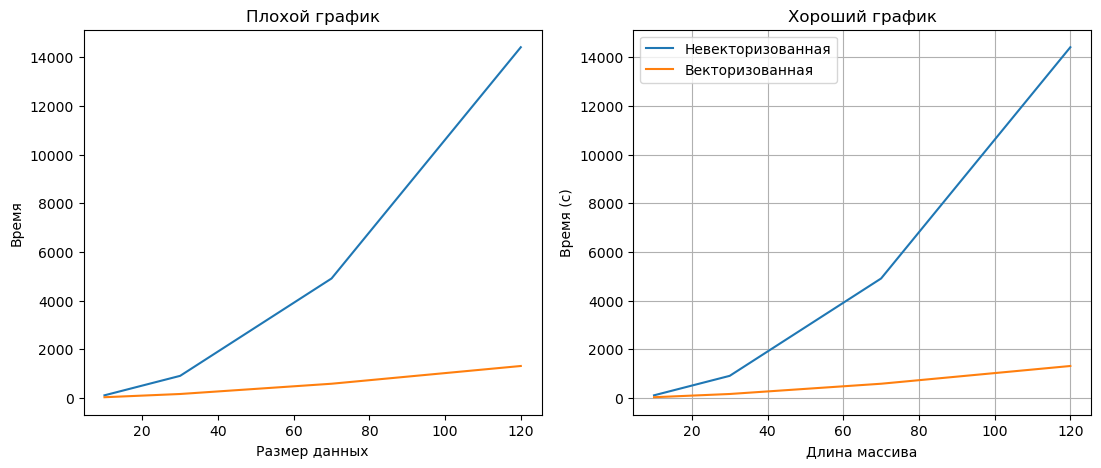

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

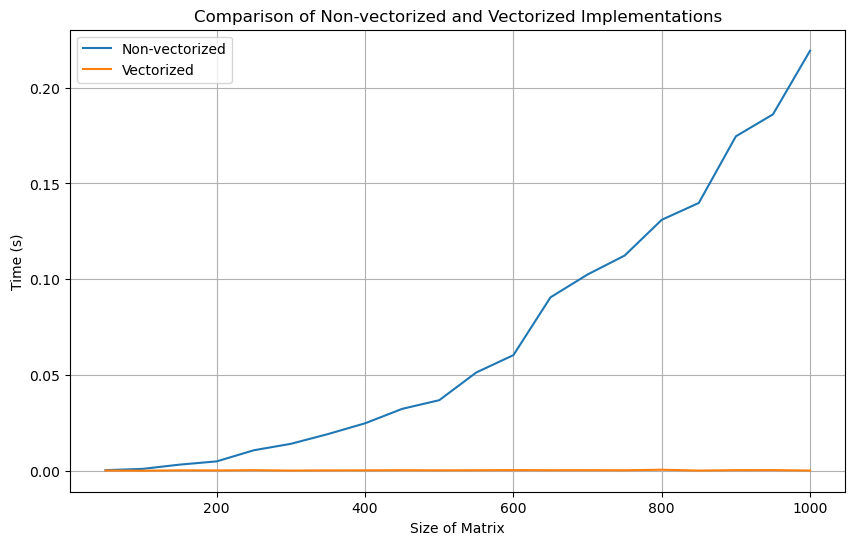

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

# Импортируем функции из файлов
from functions import prod_non_zero_diag as non_vectorized_func
from functions_vectorized import prod_non_zero_diag as vectorized_func

# Генерируем данные разных размеров
data_sizes = np.arange(50, 1050, 50)
non_vectorized_times = []
vectorized_times = []

for size in data_sizes:
    matrix = np.random.randint(0, 5, size=(size, size))
    non_vectorized_time = timeit.timeit(lambda: non_vectorized_func(matrix), number=10)
    vectorized_time = timeit.timeit(lambda: vectorized_func(matrix), number=10)
    non_vectorized_times.append(non_vectorized_time)
    vectorized_times.append(vectorized_time)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, non_vectorized_times, label='Non-vectorized')
plt.plot(data_sizes, vectorized_times, label='Vectorized')
plt.title('Comparison of Non-vectorized and Vectorized Implementations')
plt.xlabel('Size of Matrix')
plt.ylabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


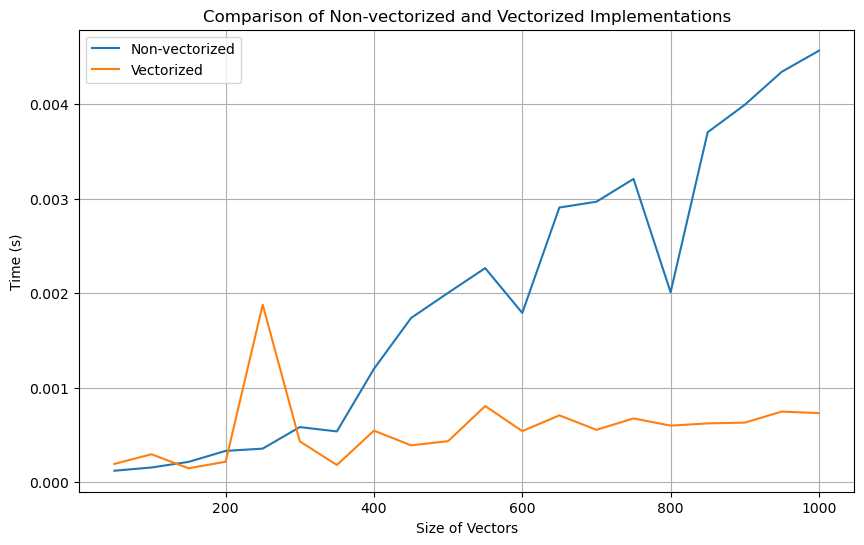

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

# Импортируем функции из файлов
from functions import are_multisets_equal as non_vectorized_func
from functions_vectorized import are_multisets_equal as vectorized_func

# Генерируем данные разных размеров
data_sizes = np.arange(50, 1050, 50)
non_vectorized_times = []
vectorized_times = []

for size in data_sizes:
    x = np.random.randint(0, 100, size=size)
    y = np.random.randint(0, 100, size=size)
    non_vectorized_time = timeit.timeit(lambda: non_vectorized_func(x, y), number=10)
    vectorized_time = timeit.timeit(lambda: vectorized_func(x, y), number=10)
    non_vectorized_times.append(non_vectorized_time)
    vectorized_times.append(vectorized_time)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, non_vectorized_times, label='Non-vectorized')
plt.plot(data_sizes, vectorized_times, label='Vectorized')
plt.title('Comparison of Non-vectorized and Vectorized Implementations')
plt.xlabel('Size of Vectors')
plt.ylabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

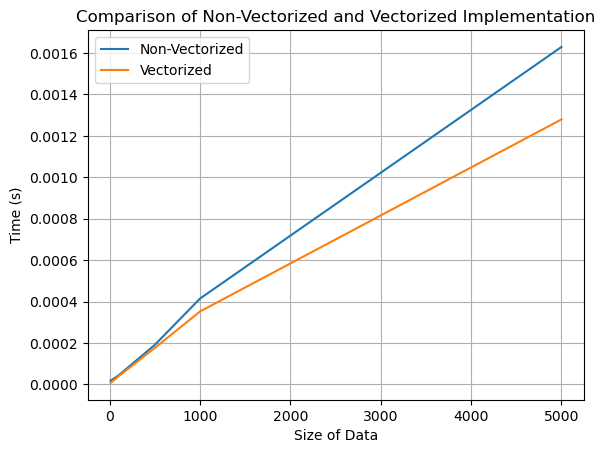

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from functions import max_after_zero as non_vectorized_func
from functions_vectorized import max_after_zero as vectorized_func

# Функция для генерации случайных данных заданного размера
def generate_data(size):
    return np.random.randint(0, 10, size=size)

# Функция для измерения времени выполнения функции
def measure_time(func, data):
    start_time = timeit.default_timer()
    func(data)
    return timeit.default_timer() - start_time

# Размеры данных для тестирования
data_sizes = [10, 100, 500, 1000, 5000]

# Времена выполнения для невекторизованной и векторизованной реализаций
time_non_vectorized = []
time_vectorized = []

for size in data_sizes:
    data = generate_data(size)
    time_non_vectorized.append(measure_time(non_vectorized_func, data))
    time_vectorized.append(measure_time(vectorized_func, data))

# Построение графиков
plt.plot(data_sizes, time_non_vectorized, label="Non-Vectorized")
plt.plot(data_sizes, time_vectorized, label="Vectorized")
plt.title("Comparison of Non-Vectorized and Vectorized Implementation")
plt.xlabel("Size of Data")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.show()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


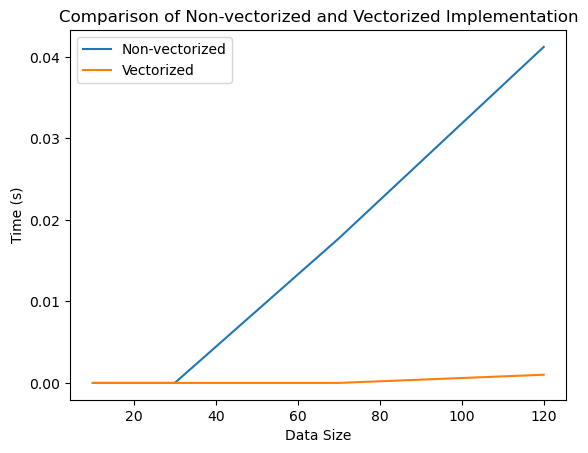

C:\Users\Сагитов Карим\AppData\Local\Temp\ipykernel_6988\976358305.py:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


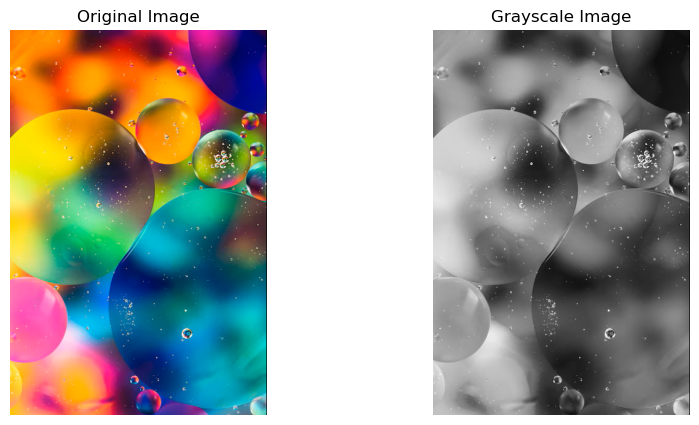

In [22]:
import numpy as np
import time
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import time
import imageio
from PIL import Image, ImageDraw
from functions import convert_image as non_vectorized_func
from functions_vectorized import convert_image as vectorized_func

def time_function(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

def generate_random_image(height, width, numChannels):
    return np.random.randint(0, 256, size=(height, width, numChannels))

weights = np.array([0.299, 0.587, 0.114])


data_sizes = [10, 30, 70, 120]

times_non_vectorized = []
times_vectorized = []

for size in data_sizes:
    image = generate_random_image(size, size, 3)
    
    time_non_vectorized = time_function(non_vectorized_func, image, weights)
    times_non_vectorized.append(time_non_vectorized)
    
    time_vectorized = time_function(vectorized_func, image, weights)
    times_vectorized.append(time_vectorized)

plt.plot(data_sizes, times_non_vectorized, label='Non-vectorized')
plt.plot(data_sizes, times_vectorized, label='Vectorized')
plt.title('Comparison of Non-vectorized and Vectorized Implementation')
plt.xlabel('Data Size')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

image_path = "iiimaage.png"  # Укажите путь к вашему изображению
image = imageio.imread(image_path)

# Веса для преобразования в оттенки серого
weights = np.array([0.299, 0.587, 0.114])

# Преобразование изображения в оттенки серого
grayscale_result = np.dot(image[..., :3], weights)

# Визуализация исходного и результата преобразования
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_result, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

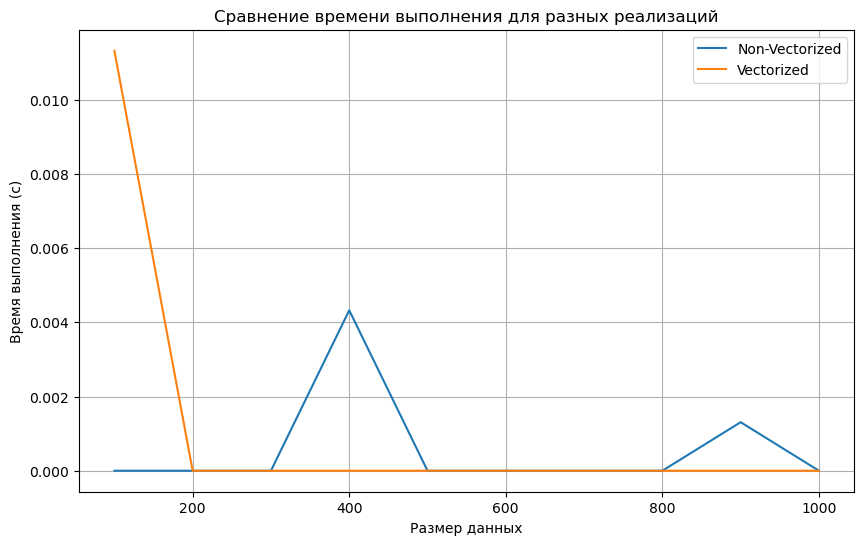

In [35]:
import numpy as np
import time
import matplotlib.pyplot as plt
from functions import run_length_encoding as non_vectorized_func
from functions_vectorized import run_length_encoding as vectorized_func

# Генерация данных для измерения времени
data_sizes = np.arange(100, 1100, 100)
execution_times_non_vectorized = []
execution_times_vectorized = []

for size in data_sizes:
    x = np.random.randint(0, 10, size=size)
    
    # Измерение времени выполнения для не векторизованной версии
    start_time = time.time()
    non_vectorized_func(x)
    end_time = time.time()
    execution_times_non_vectorized.append(end_time - start_time)
    
    # Измерение времени выполнения для векторизованной версии
    start_time = time.time()
    vectorized_func(x)
    end_time = time.time()
    execution_times_vectorized.append(end_time - start_time)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, execution_times_non_vectorized, label='Non-Vectorized')
plt.plot(data_sizes, execution_times_vectorized, label='Vectorized')
plt.xlabel('Размер данных')
plt.ylabel('Время выполнения (с)')
plt.title('Сравнение времени выполнения для разных реализаций')
plt.legend()
plt.grid(True)
plt.show()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

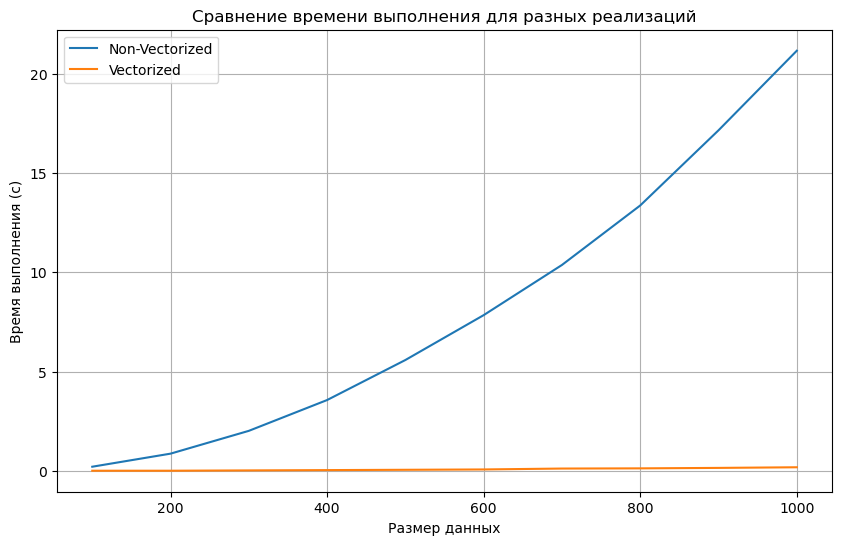

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
from functions import pairwise_distance as non_vectorized_func
from functions_vectorized import pairwise_distance as vectorized_func

# Генерация данных для измерения времени
data_sizes = np.arange(100, 1100, 100)
execution_times_non_vectorized = []
execution_times_vectorized = []

for size in data_sizes:
    X = np.random.rand(size, 10)
    Y = np.random.rand(size, 10)
    
    # Измерение времени выполнения для не векторизованной версии
    start_time = time.time()
    non_vectorized_func(X, Y)
    end_time = time.time()
    execution_times_non_vectorized.append(end_time - start_time)
    
    # Измерение времени выполнения для векторизованной версии
    start_time = time.time()
    vectorized_func(X, Y)
    end_time = time.time()
    execution_times_vectorized.append(end_time - start_time)
    

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, execution_times_non_vectorized, label='Non-Vectorized')
plt.plot(data_sizes, execution_times_vectorized, label='Vectorized')
plt.xlabel('Размер данных')
plt.ylabel('Время выполнения (с)')
plt.title('Сравнение времени выполнения для разных реализаций')
plt.legend()
plt.grid(True)
plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

<!doctype html>
<html>
    <head>
        <!-- Заголовок документа -->
    </head>
    <body>
        Я построил <em><strong>графики</strong></em>, показывающие <u>зависимость</u> <em>времени<em> от <em>входных данных<em>, <del>и смог поработать с изображениями<del>.
    </body>
</html>